<a href="https://colab.research.google.com/github/Se-Boruk/Ucz_nienadzorowane_projekt/blob/Clustering-v0.1/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from DataBase.DataBase_Functions import Custom_DataSet_Manager as DB
import Config as con
from datasets import load_dataset

In [3]:
manager = DB(
    DataSet_path=r'C:\Users\jakub\Desktop\Repozytoria Github\Databases\Uczenie ze wzmocnieniem',
    train_split=0.7,
    val_split=0.15,
    test_split=0.15,
    random_state=259189
    )

# Nowa sekcja

In [4]:
manager.download_database("Artificio/WikiArt_Full")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/780 [00:00<?, ?B/s]

data/train-00000-of-00007-dd79acf31a6674(…):   0%|          | 0.00/462M [00:00<?, ?B/s]

data/train-00001-of-00007-16d737d74ca9cb(…):   0%|          | 0.00/463M [00:00<?, ?B/s]

data/train-00002-of-00007-73e15989674f27(…):   0%|          | 0.00/464M [00:00<?, ?B/s]

data/train-00003-of-00007-911b21abee70c8(…):   0%|          | 0.00/464M [00:00<?, ?B/s]

data/train-00004-of-00007-a49c31eac19299(…):   0%|          | 0.00/464M [00:00<?, ?B/s]

data/train-00005-of-00007-053e48131b243e(…):   0%|          | 0.00/465M [00:00<?, ?B/s]

data/train-00006-of-00007-daeb2ac40cedae(…):   0%|          | 0.00/464M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/103250 [00:00<?, ? examples/s]

Saving the dataset (0/3 shards):   0%|          | 0/103250 [00:00<?, ? examples/s]

✅ Dataset downloaded and flagged!


In [5]:
train, val, test = manager.load_dataset_from_disk()

print(train[0])  # Przykładowy rekord
print(len(train), len(val), len(test))

{'style': 'Rococo', 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7E622204A840>}
72274 15488 15488


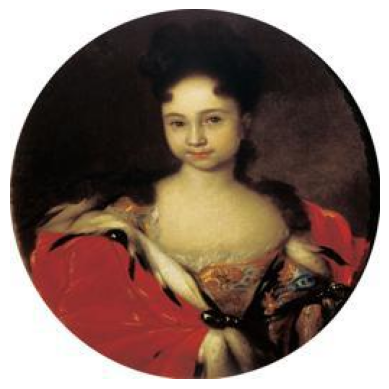

{'style': 'Baroque', 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7E6221AD8830>}


In [6]:
from PIL import Image
import matplotlib.pyplot as plt

number = 555

sample = train[number]["image"]  # To już jest obiekt PIL.Image
plt.imshow(sample)
plt.axis("off")
plt.show()
print(train[number])

In [7]:
unique_styles = len(set(train["style"]))
print(unique_styles)

134


In [8]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Uruchomione na:", device)

print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")

Uruchomione na: cuda
PyTorch version: 2.8.0+cu126
CUDA available: True
CUDA device: Tesla T4
